In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyDOE2 import lhs
from mandelbrot import *
from ortho_sampling import init_genrand
from scipy.stats import ttest_ind
import time

In [ ]:
num_points = int(1E6)
iterations = 300
plot_mandelbrot(num_points=num_points, iterations=iterations)

In [ ]:
num_points = 2000

uniform_sample = complex_random_array(num_points)
lhs_sample = complex_random_array(num_points, method='lhs')
ortho_sample = complex_random_array(num_points, method='ortho')
cutout_sample, _ = complex_random_array(num_points, method='cutout')
print(type(ortho_sample))

fig, axs = plt.subplots(2, 2)
fig.set_figwidth(13)
fig.set_figheight(9)
axs[0,0].scatter(uniform_sample.real, uniform_sample.imag, label="Uniform Samples", c='k', s=2)
axs[0,1].scatter(lhs_sample.real, lhs_sample.imag, label="LHS Samples", c='b', s=2)
axs[1,0].scatter(ortho_sample.real, ortho_sample.imag, label="Orthogonal Samples", c='r', s=2)
axs[1,1].scatter(cutout_sample.real, cutout_sample.imag, label="Uniform samples with cutout", c='g', s=2)

axs[0, 0].set_title("Uniform Samples")
axs[0, 1].set_title("LHS Samples")
axs[1, 0].set_title("Orthogonal Samples")
axs[1, 1].set_title("Uniform samples with cutout")

plt.savefig('sampling_methods.png', dpi=300)

In [11]:

start_time = time.time()
best_area_value, best_area_std, best_area_conf = estimate_area(int(1E6), 40, 200, 10)
end_time = time.time()
execution_time = end_time - start_time

print("Execution Time:", execution_time, "seconds")
print(best_area_value, best_area_std, best_area_conf)

/Users/noahknijff/Downloads/Computational Science/Stochastic-Simulation/mandelbrot.py:11: RuntimeWarning: overflow encountered in scalar multiply
  z.append(z[k] * z[k] + c)
/Users/noahknijff/Downloads/Computational Science/Stochastic-Simulation/mandelbrot.py:11: RuntimeWarning: invalid value encountered in scalar multiply
  z.append(z[k] * z[k] + c)
/Users/noahknijff/Downloads/Computational Science/Stochastic-Simulation/mandelbrot.py:24: RuntimeWarning: overflow encountered in scalar multiply
  return np.sqrt((z.real)*(z.real) + (z.imag)*(z.imag))


Execution Time: 985.537495136261 seconds
1.52644365 0.0025263430838862845 [1.525625393341309, 1.527261906658691]


In [12]:

start_time = time.time()
best_area_value_lhs, best_area_std_lhs, best_area_conf_lhs = estimate_area(int(1E6), 40, 200, 10, method='LHS')
end_time = time.time()
execution_time = end_time - start_time

print("Execution Time:", execution_time, "seconds")
print(best_area_value_lhs, best_area_std_lhs, best_area_conf_lhs)

Execution Time: 1369.6173141002655 seconds
1.52613405 0.0015586380906098692 [1.525629223080701, 1.5266388769192991]


In [13]:
start_time = time.time()
best_area_value_ortho, best_area_std_ortho, best_area_conf_ortho = estimate_area(int(1E6), 40, 200, 10, method='Orthogonal')
end_time = time.time()
execution_time = end_time - start_time

print("Execution Time:", execution_time, "seconds")
print(best_area_value_ortho, best_area_std_ortho, best_area_conf_ortho)

Execution Time: 1099.8808870315552 seconds
1.5259029 0.00024995077515382506 [1.52582194350307, 1.52598385649693]


In [14]:
start_time = time.time()
best_area_value_cutout, best_area_std_cutout, best_area_conf_cutout = estimate_area(int(1E6), 40, 200, 10, method='Cutout')
end_time = time.time()
execution_time = end_time - start_time

print("Execution Time:", execution_time, "seconds")
print(best_area_value_cutout, best_area_std_cutout, best_area_conf_cutout)

Execution Time: 997.3261239528656 seconds
1.5156911637182158 0.0025086701171471585 [1.5148786311525055, 1.516503696283926]


In [ ]:
num_points = int(1E5)
# may not work properly when iterations / intermediate_steps != 10
iterations = 200
intermediate_steps = 20 
repetitions = 40
average_areas_uniform, average_lengths_uniform = intermediate_iterations(sample_size=num_points, iterations=iterations, 
                                                              intermediate_steps=intermediate_steps, repetitions=repetitions)

average_areas_lhs, average_lengths_lhs = intermediate_iterations(sample_size=num_points, iterations=iterations, 
                                                              intermediate_steps=intermediate_steps, repetitions=repetitions, method='LHS')

average_areas_ortho, average_lengths_ortho = intermediate_iterations(sample_size=num_points, iterations=iterations, 
                                                              intermediate_steps=intermediate_steps, repetitions=repetitions, method='Orthogonal')

average_areas_cutout, average_lengths_cutout = intermediate_iterations(sample_size=num_points, iterations=iterations, 
                                                              intermediate_steps=intermediate_steps, repetitions=repetitions, method='Cutout')


In [ ]:
methods = ['Uniform', 'LHS', 'Orthogonal', 'Cutout']
colors = ['k', 'b', 'r', 'g']

x = [i * intermediate_steps for i in range(iterations // intermediate_steps)]
plt.plot(x[1:], average_lengths_uniform[1:], colors[0], label=methods[0])
plt.plot(x[1:], average_lengths_lhs[1:], colors[1], label=methods[1])
plt.plot(x[1:], average_lengths_ortho[1:], colors[2], label=methods[2])
plt.plot(x[1:], average_lengths_cutout[1:], colors[3], label=methods[3])
plt.title(f'Number of points in Mandelbrot, N = {repetitions}')
plt.xlabel('iteration')
plt.ylabel('# of points beloning to Mandelbrot set')
plt.legend()

plt.figure()
plt.plot(x[1:], average_areas_uniform[1:], 'k', label=methods[0])
plt.plot(x[1:], average_areas_lhs[1:], 'b', label=methods[1])
plt.plot(x[1:], average_areas_ortho[1:], 'r', label=methods[2])
plt.plot(x[1:], average_areas_cutout[1:], 'g', label=methods[3])
plt.title(f'Area estimation for several sampling techniques')
plt.xlabel('iteration')
plt.ylabel(r'$\overline{A}$')
plt.legend()
plt.savefig('area_vs_iteration.png', dpi=300)

In [ ]:
best_area_value_uniform = 1.527021
best_area_value_lhs = 1.5249972
best_area_value_ortho = 1.525929
best_area_value_cutout = 1.5238682060290496

errors_uniform = calculate_error_over_iterations(best_area_value_uniform, average_areas_uniform)
errors_lhs = calculate_error_over_iterations(best_area_value_lhs, average_areas_lhs)
errors_ortho = calculate_error_over_iterations(best_area_value_ortho, average_areas_ortho)
errors_cutout= calculate_error_over_iterations(best_area_value_cutout, average_areas_cutout)

methods = ['Uniform', 'LHS', 'Orthogonal', 'Cutout']
colors = ['k', 'b', 'r', 'g']

x = [i * intermediate_steps for i in range(iterations // intermediate_steps)]
plt.plot(x[1:], errors_uniform[1:], colors[0], label=methods[0])
plt.plot(x[1:], errors_lhs[1:], colors[1], label=methods[1])
plt.plot(x[1:], errors_ortho[1:], colors[2], label=methods[2])
plt.plot(x[1:], errors_cutout[1:], colors[3], label=methods[3])
plt.plot(x[1:], [0.05 for i in range(len(errors_cutout) - 1)], 'k--', linewidth=1)
plt.title('Convergence of area estimation')
plt.xlabel('iteration')
plt.ylabel(r'$\delta\overline{A}$')
plt.xlim(20,180)
plt.legend()
plt.savefig('error_vs_iteration.png', dpi=300)

/Users/noahknijff/Downloads/Computational Science/Stochastic-Simulation/mandelbrot.py:11: RuntimeWarning: overflow encountered in scalar multiply
  z.append(z[k] * z[k] + c)
/Users/noahknijff/Downloads/Computational Science/Stochastic-Simulation/mandelbrot.py:11: RuntimeWarning: invalid value encountered in scalar multiply
  z.append(z[k] * z[k] + c)
/Users/noahknijff/Downloads/Computational Science/Stochastic-Simulation/mandelbrot.py:24: RuntimeWarning: overflow encountered in scalar multiply
  return np.sqrt((z.real)*(z.real) + (z.imag)*(z.imag))
/Users/noahknijff/Downloads/Computational Science/Stochastic-Simulation/mandelbrot.py:24: RuntimeWarning: overflow encountered in scalar add
  return np.sqrt((z.real)*(z.real) + (z.imag)*(z.imag))


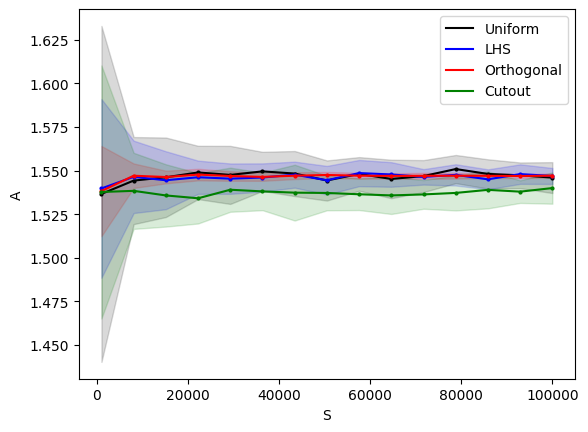

In [2]:
sample_sizes = np.linspace(int(1E3), int(1E5), num=15).astype(int)

methods=['Uniform', 'LHS', 'Orthogonal', 'Cutout']
areas, stds = plot_area_vs_sample_size(sample_sizes=sample_sizes, repetitions=40, iterations=100, iteration_step=10, methods=methods)

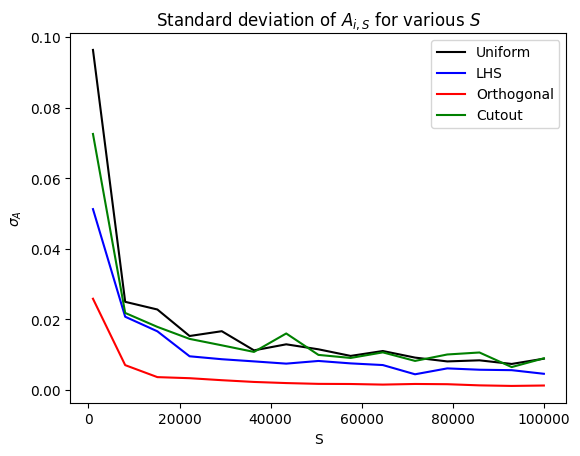

In [5]:
colors = ['k', 'b', 'r', 'g']
methods=['Uniform', 'LHS', 'Orthogonal', 'Cutout']
for i, std in enumerate(stds):
    plt.plot(sample_sizes, std, colors[i], label=methods[i])
plt.title(r'Standard deviation of $A_{i,S}$ for various $S$')
plt.xlabel('S')
plt.ylabel(r'$\sigma_{A}$')
plt.legend()
plt.savefig('stdev_vs_S')

In [6]:
""" Tests for normality of resulting mean areas """

# We can't use t-test if at least one of the output p-values is significant

from scipy.stats import shapiro

for i, data in enumerate(areas):

    statistic, p_value = shapiro(data)

    # Output the results
    print(f"Shapiro-Wilk for {methods[i]}: p_value = {p_value:.4f}")


Shapiro-Wilk for Uniform: p_value = 0.0093
Shapiro-Wilk for LHS: p_value = 0.0143
Shapiro-Wilk for Orthogonal: p_value = 0.0000
Shapiro-Wilk for Cutout: p_value = 0.9881


In [7]:
from scipy.stats import ttest_ind
output = []
for i, method1 in enumerate(methods):
    for j, method2 in enumerate(methods):
        if method1 != method2:
            t_statistic, p_value = ttest_ind(areas[i], areas[j])
            result = f'{method1} vs {method2} p_value = {p_value}'
            result_reverse = f'{method2} vs {method1} p_value = {p_value}'
            if (result not in output) and (result_reverse not in output):
                output.append(result)
                print(result)

Uniform vs LHS p_value = 0.6286735353089798
Uniform vs Orthogonal p_value = 0.9094150029746979
Uniform vs Cutout p_value = 1.573993865430097e-10
LHS vs Orthogonal p_value = 0.6428640489861392
LHS vs Cutout p_value = 3.134054267348075e-13
Orthogonal vs Cutout p_value = 2.896443058787288e-13


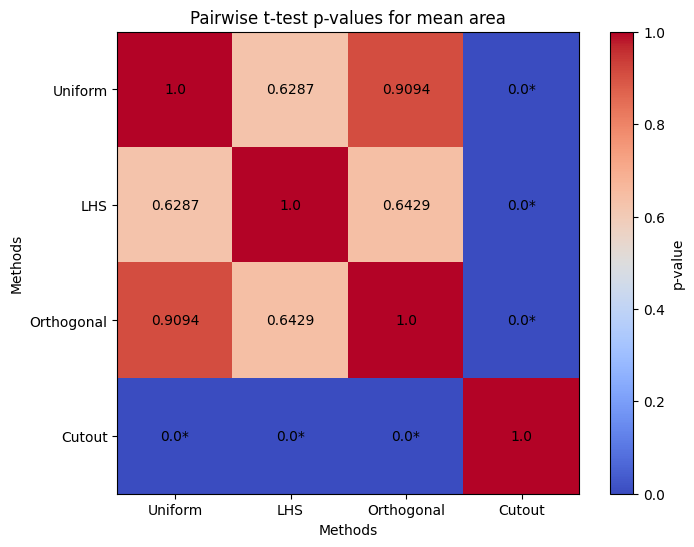

In [8]:
plot_pairwise_ttest(areas, methods, input_type='mean areas')

In [9]:
""" Normality test for stds """

from scipy.stats import shapiro

for i, data in enumerate(stds):

    statistic, p_value = shapiro(data)

    # Output the results
    print(f"Shapiro-Wilk for {methods[i]}: p_value = {p_value:.4f}")


Shapiro-Wilk for Uniform: p_value = 0.0000
Shapiro-Wilk for LHS: p_value = 0.0000
Shapiro-Wilk for Orthogonal: p_value = 0.0000
Shapiro-Wilk for Cutout: p_value = 0.0000


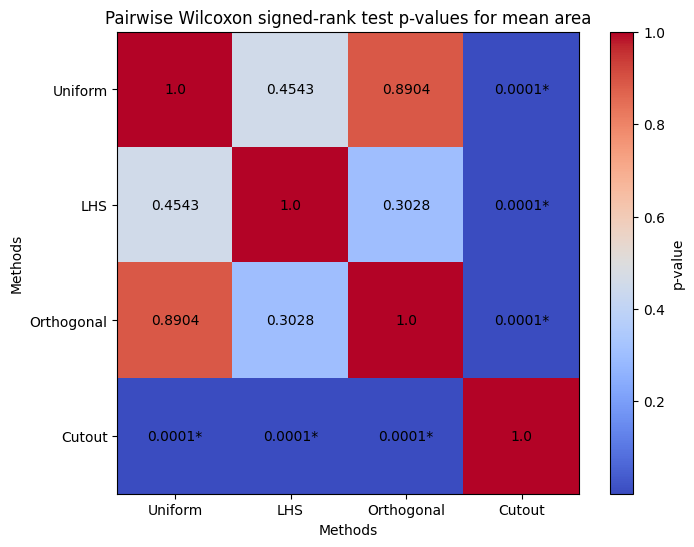

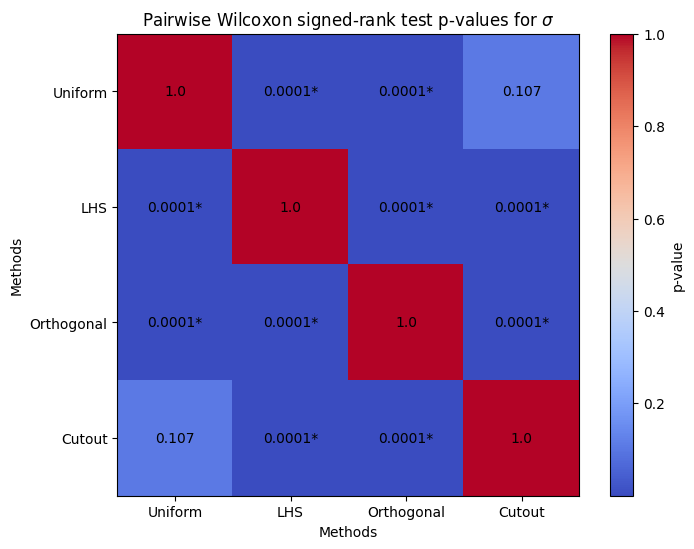

In [10]:
plot_pairwise_wilcoxon_test(areas, methods, input_type='mean area')

plot_pairwise_wilcoxon_test(stds, methods, input_type='$\sigma$')